

# Project: Investigate a Dataset (Analysis of TMDb 10,000 movies dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I choose the TMDb movie data set for data analysis. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including :
    user ratings ,The budjet and revenue of The Movies, release year,production companies ,The movies names, directors and Cast
    I would like to find other intresting patterns in this dataset
    using paython packges pandas , numpy , seaborn , matplotlib in this analysis
    
  > # Questions research

<li> Which Top 20 movies earn highest profit </li>
<li> Which movie Has Highest /  Lowest Profit </li>
<li> Which movie get the highest or lowest votes (Ratings) </li>
<li> what are most profitable years </li>
<li> what are most made geners </li>
    

In [30]:
# First import the packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

>  After Observing the dataset , we will
    clean data by Remove unnecessry columns , drop dublicted rows, change the data type for some columns 
     and spilt the rows that containes more than values ( in this dataset seprating by pipe (|) like genres , cast ,production_companies

### General Properties

In [31]:
# read the data from CSV file to dataframe and print out a few lines. 
df_M = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
df_M.head(2)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


 in this section I will find information about the data set like columns names , data tpe , number of rows and columns and numper of non null values

In [3]:
# using info() function
df_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [126]:
# hear the dimensions of the dataframe , numbers of columns and rows
df_M.shape

(10866, 21)

 <li> Observation From The Dataset
<li> Number of rows are 10866
<li> Number of columns are 21
<li> The data type of each column 
<li> data type of the column 'imdb_id' is object should be int 
<li> the data type of the column 'release_date' is object should be date
<li> Remove the unused colums homepage,tagline, budget_adj and revenue_adj
<li> genres , cast and production_companies columns have multi values should  be spearate

 




### Data Cleaning (Information That We Need To Delete Or Modify)




1. remove duplicated rows

In [32]:
# sum of duplicated rows
df_M.duplicated().sum()

1

In [128]:
# drop duplicated using 
df_M.drop_duplicates(inplace = True)
df_M.duplicated().sum()

0

2- Remove the unused colums that are not needes in the analysis process
 homepage,tagline, budget_adj and revenue_adj 

In [33]:
# use drop() to delete columns
df_M.drop(['budget_adj','revenue_adj','homepage','tagline'],axis =1,inplace = True)


In [34]:
print ("the number of columns aftr drop unused colums is 17 :" )
df_M.shape 

the number of columns aftr drop unused colums is 17 :


(10866, 17)

Summary statistics of the runtime for the movies 

In [63]:
# using describe()
df_M['runtime'].describe()

count    14038.000000
mean       104.234506
std         27.148362
min          0.000000
25%         91.000000
50%        100.000000
75%        113.000000
max        900.000000
Name: runtime, dtype: float64

3- Changing Format Of Release Date Into Datetime Format

In [35]:
# the data type of the column 'release_date' is object should be date
df_M['release_date'] = pd.to_datetime(df_M['release_date'])

In [37]:
df_M.release_date.dtypes

dtype('<M8[ns]')

4- I obserive the data type of column 'imdb_id' is object and should modify to int but first I will spilet the litters from the numbers


In [38]:
# 1. Separate letters (tt) in the column 'imdb_id ' from numbers and show the result
df_M['imdb_id'] = df_M['imdb_id'].str.replace('tt','')


In [39]:
# 2. data type of imdb_id is object
df_M.imdb_id.dtypes

dtype('O')

In [40]:
df_M.imdb_id = pd.factorize(df_M.imdb_id)[0]

In [41]:
# 4. Now the data type of imdb_id has been fixed
df_M.imdb_id.dtypes

dtype('int64')

5- Separate rows that have more than one value which is separated by pipe (|)
<li> The columns contain pipes Th genres , production_companies , cast

In [42]:
# The colmn genres split by "|" I but in data frame
hb_M = df_M[df_M['genres'].str.contains('|') == True]
hb_M.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


In [43]:
# create two copies of the hb_M dataframe
df_1 = hb_M.copy()  
df_2 = hb_M.copy()  

# Each one should look like this
df_1.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


In [44]:
df_2.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


In [45]:
split_columns = ['genres','production_companies','cast']

for c in split_columns:
  df_1[c] = df_1[c].astype(str).str.split("|").str[0]
  df_2[c] = df_2[c].astype(str).str.split("|").str[1]

In [17]:
# combine dataframes to add to the original dataframe
new_rows = df_1.append(df_2)

# now we have separateit to new rows 
new_rows

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios,2015-06-09,5562,6.5,2015
1,76341,1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015
2,262500,2,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015
3,140607,3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm,2015-12-15,5292,7.5,2015
4,168259,4,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures,2015-04-01,2947,7.3,2015
5,281957,5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western,Regency Enterprises,2015-12-25,3929,7.2,2015
6,87101,6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger,Alan Taylor,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction,Paramount Pictures,2015-06-23,2598,5.8,2015
7,286217,7,7.667400,108000000,595380321,The Martian,Matt Damon,Ridley Scott,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama,Twentieth Century Fox Film Corporation,2015-09-30,4572,7.6,2015
8,211672,8,7.404165,74000000,1156730962,Minions,Sandra Bullock,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family,Universal Pictures,2015-06-17,2893,6.5,2015
9,150540,9,6.326804,175000000,853708609,Inside Out,Amy Poehler,Pete Docter,dream|cartoon|imaginary friend|animation|kid,"Growing up can be a bumpy road, and it's no ex...",94,Comedy,Walt Disney Pictures,2015-06-09,3935,8.0,2015


In [46]:
# drop the original hybrid rows
df_M.drop(hb_M.index, inplace=True)

# add in our newly separated rows
df_M = df_M.append(new_rows, ignore_index=True)

In [47]:
df_M.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,363869,424,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,NaN,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,2015-10-29,21,6.1,2015
1,361043,619,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,2015-10-06,13,5.0,2015


After separating drop the null values 
1. Remove null values

In [48]:
df_M.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                     219
director                  86
keywords                2968
overview                   7
runtime                    0
genres                  2351
production_companies    4462
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [49]:
df_M.dropna(inplace=True)
df_M.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [50]:
df_M.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
23,135397,0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios,2015-06-09,5562,6.5,2015
24,76341,1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015


<a id='eda'></a>
## Exploratory Data Analysis

>  After trimmed and cleaned The data, Now move on to exploration. Compute statistics and create visualizations to find Patterns between the data , find answers of My research questions . 
### Research Question 1 (Top 20 movies based on its Profit)

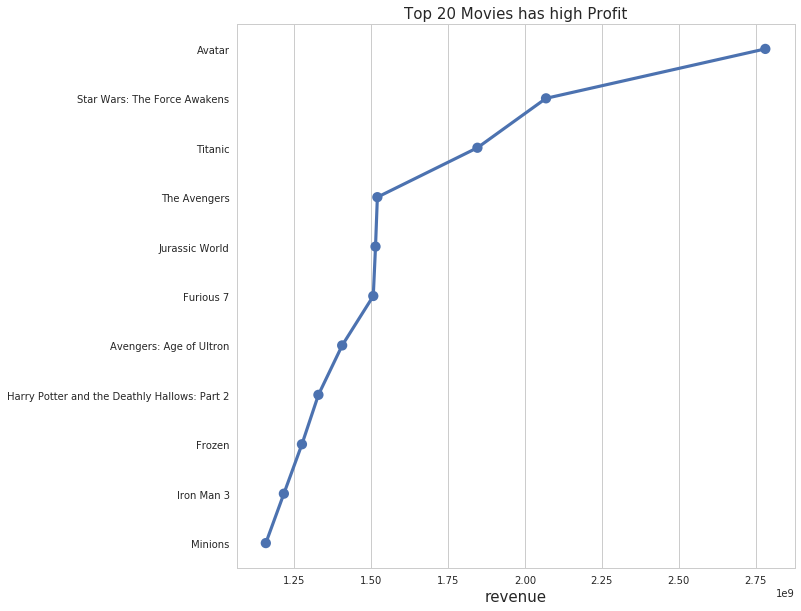

In [51]:
info = pd.DataFrame(df_M['revenue'].sort_values(ascending = False))
info['original_title'] = df_M['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:20])
y = list(info['revenue'][:20])
ax = sns.pointplot(x=y , y=x) 
sns.set(rc={'figure.figsize':(10,10)})
ax.set_title("Top 20 Movies has high Profit" , fontsize = 15)
ax.set_xlabel("revenue" , fontsize = 15)
sns.set_style("darkgrid")

The Avatar Movie has the highst provit in the dataset

### Research Question 2 (Which movie Has Highest /  Lowest Profit and budget)

In [52]:
#calculate Profit for each of the movie
#add a new column Profit for each of the movie
df_M['Profit'] = df_M['revenue'] - df_M['budget']

In [53]:
# create function to find min and max 
#use the function 'idmin' to find the index of lowest profit movie.
#use the function 'idmax' to find the index of Highest profit movie.
def find_minmax(x):
    min_M = df_M[x].idxmin()
    max_M = df_M[x].idxmax()
    high = pd.DataFrame(df_M.loc[max_M,:])
    low = pd.DataFrame(df_M.loc[min_M,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df_M['original_title'][max_M])
    print("Movie Which Has Lowest "+ x + "  : ",df_M['original_title'][min_M])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Warrior's Way


,1406,2262
id,19995,46528
imdb_id,1384,2239
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington,Kate Bosworth
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
overview,"In the 22nd century, a paraplegic Marine is di...",An Asian assassin (Dong-gun Jang) is forced to...


In [54]:
# use find_minmax to find Movie Which Has Highest ,Lowest budget
find_minmax('budget')

Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Mr. Holmes


,2262,53
id,46528,280996
imdb_id,2239,30
popularity,0.25054,3.92733
budget,425000000,0
revenue,11087569,29355203
original_title,The Warrior's Way,Mr. Holmes
cast,Kate Bosworth,Ian McKellen
director,Sngmoo Lee,Bill Condon
keywords,assassin|small town|revenge|deception|super speed,london|detective|sherlock holmes
overview,An Asian assassin (Dong-gun Jang) is forced to...,"The story is set in 1947, following a long-ret..."


### Research Question 3  ( Movie with Highest And Lowest Votes?)

In [55]:
#find_minmax to find Movie Which Has rating
find_minmax('vote_average')

Movie Which Has Highest vote_average :  The Story of Film: An Odyssey
Movie Which Has Lowest vote_average  :  Transmorphers


,3908,7778
id,125336,25055
imdb_id,3888,7762
popularity,0.006925,0.12112
budget,0,0
revenue,0,0
original_title,The Story of Film: An Odyssey,Transmorphers
cast,Mark Cousins,Matthew Wolf
director,Mark Cousins,Leigh Scott
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,futuristic
overview,"The Story of Film: An Odyssey, written and dir...",About a race of alien robots that have conquer...


In [56]:
#find the max and min vote averag
df_M.vote_average.max() 

9.1999999999999993

In [57]:
df_M.vote_average.min()

1.5

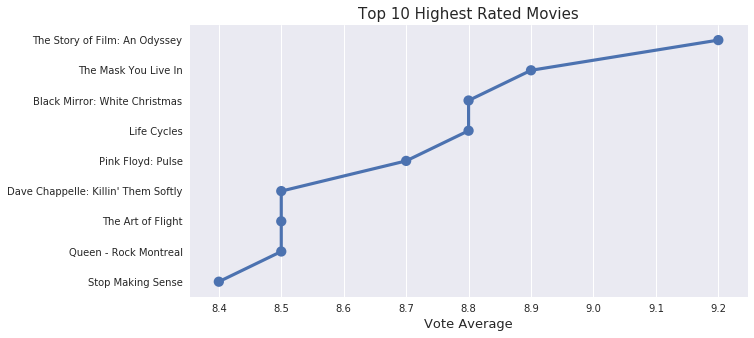

In [59]:
#top 10 highets rated movies.
#sort the 'vote_average' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df_M['vote_average'].sort_values(ascending = False))
info['original_title'] = df_M['original_title']
data = list(map(str,(info['original_title'])))

##extract the top 10 highly rated movies data from the list and dataframe.
x = list(data[:10])
y = list(info['vote_average'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Vote Average",fontsize = 13)
#setup the stylesheet
sns.set_style("darkgrid")


The chart shows the Story of Film: An Odyssey Movie has Highest votes

### Research Question 3 : what are most profitable years 

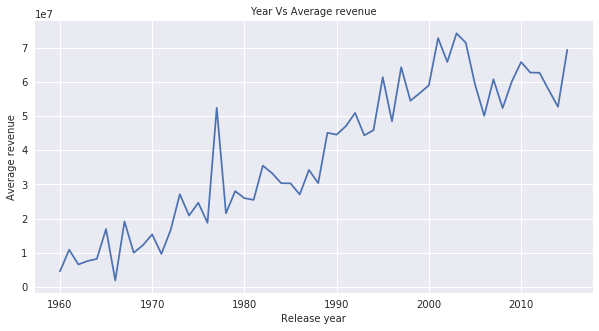

In [60]:
#do year-wise analysis of profit earn by movies in each earn.
#take the average of profit made by movies in each year and plot.
#make the group of the data according to their release_year and find the mean profit and plot.
df_M.groupby('release_year')['revenue'].mean().plot()

#setup the title and labels of the figure.
plt.title("Year Vs Average revenue",fontsize = 10)
plt.xlabel('Release year',fontsize = 10)
plt.ylabel('Average revenue',fontsize =10)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("whitegrid")

According to the plot The Revenue of the movies has increased over the years
    

In [ ]:
# Research Question 4 : what are most made geners and most companie produced movies

In [68]:
df_M['production_companies'].value_counts()

nan                                       659
Universal Pictures                        474
Paramount Pictures                        419
Warner Bros.                              307
Columbia Pictures                         268
Twentieth Century Fox Film Corporation    264
New Line Cinema                           210
Walt Disney Pictures                      191
Metro-Goldwyn-Mayer (MGM)                 150
Columbia Pictures Corporation             145
TriStar Pictures                          141
Miramax Films                             134
Touchstone Pictures                       113
DreamWorks SKG                             85
Village Roadshow Pictures                  84
20th Century Fox                           79
Regency Enterprises                        77
BBC Films                                  74
United Artists                             73
Orion Pictures                             70
Fox Searchlight Pictures                   63
Dimension Films                   

In [62]:
# using value_counts() to count the number of movies for each genre
df_M['genres'].value_counts()


Drama              3046
Comedy             2495
Action             1739
Horror             1036
Thriller            983
Adventure           881
Crime               668
Romance             556
Fantasy             418
Animation           397
Science Fiction     370
Documentary         347
Family              295
Mystery             266
Music               167
History             135
War                  87
TV Movie             66
Western              64
Foreign              22
Name: genres, dtype: int64

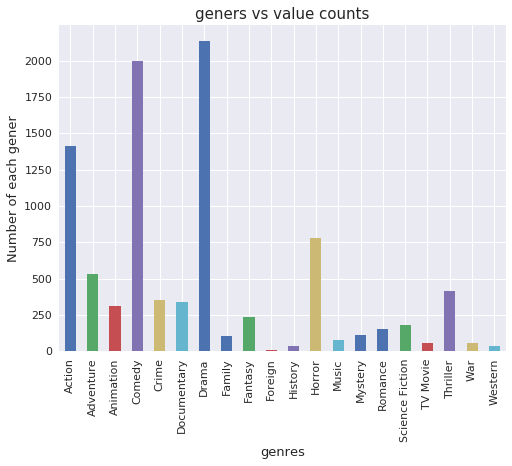

In [159]:

#count geners of movies using value_counts().
geners_d = df_M['genres'].value_counts().sort_index()


#plot the bar graph using plot.
geners_d.plot(x='genres',kind='bar',fontsize = 11,figsize=(8,6))

#set the labels and titles of the plot.
plt.title('geners vs value counts',fontsize = 15)
plt.xlabel('genres',fontsize = 13)
plt.ylabel('Number of each gener',fontsize = 13)
sns.set_style("darkgrid")

The bar chart shows the drame movies are most made 

<a id='conclusions'></a>
## Conclusions

 <li> Avatar, Star Wars and Titanic are the most profitable movies. <li> Maximum Number Of Movies Release In year 2014. <li> Drame, Comedy and Action are most-made genres.
<li> The Story of Film: An Odyssey Movie has Highest votes
<li> Drama is the most popular genre Then comedy then action.
<li> Short or Long duration movies are more popular than long duration movies.
<li> The profits of the movies are increasing over the years.
<li> Revenue is directly connected to the budget.
<li> Universal Pictures and Paramount Pictures are the most production companies produced Movies
 
## Limitations
<li> During the data cleaning process, I split the data seperated by '|'  for easy parsing during the exploration phase. This increases the time taken in analysis the data set and .    
produced missing values 
<li> The non numeric missing values is harder to handle from numeric values (which can count the mean to fill it  )  


In [69]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0